In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [ ]:
print("\nEmployee Retention (Left = 1 means employee left, 0 means stayed):")
print(df['left'].value_counts())


Employee Retention (Left = 1 means employee left, 0 means stayed):
left
0    11428
1     3571
Name: count, dtype: int64


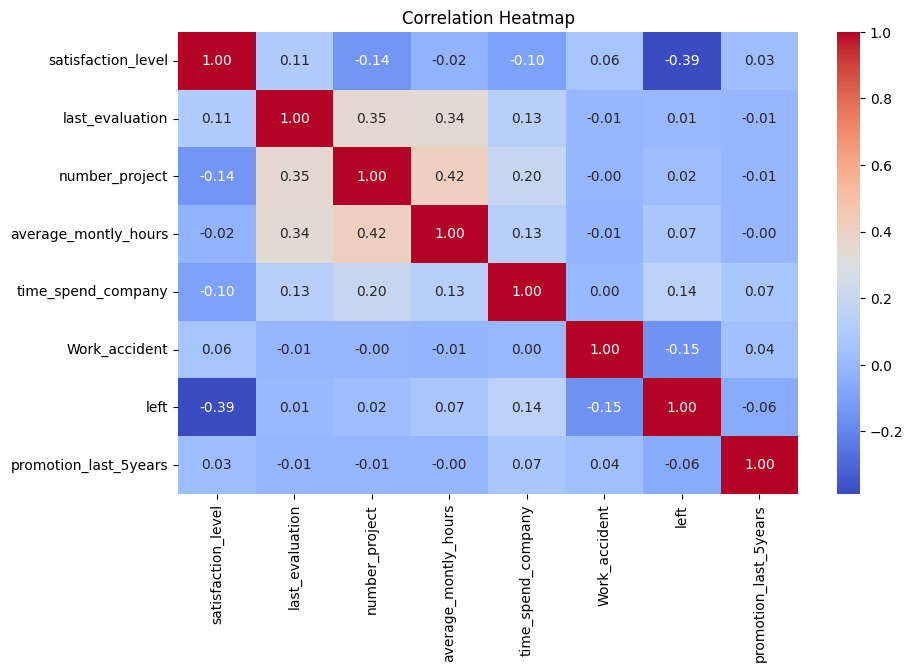

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



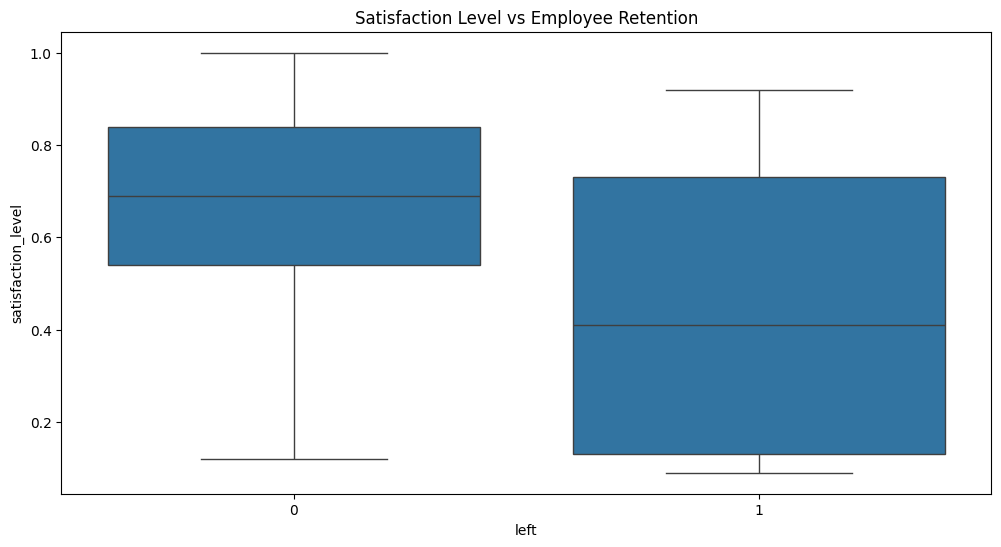

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Employee Retention')
plt.show()

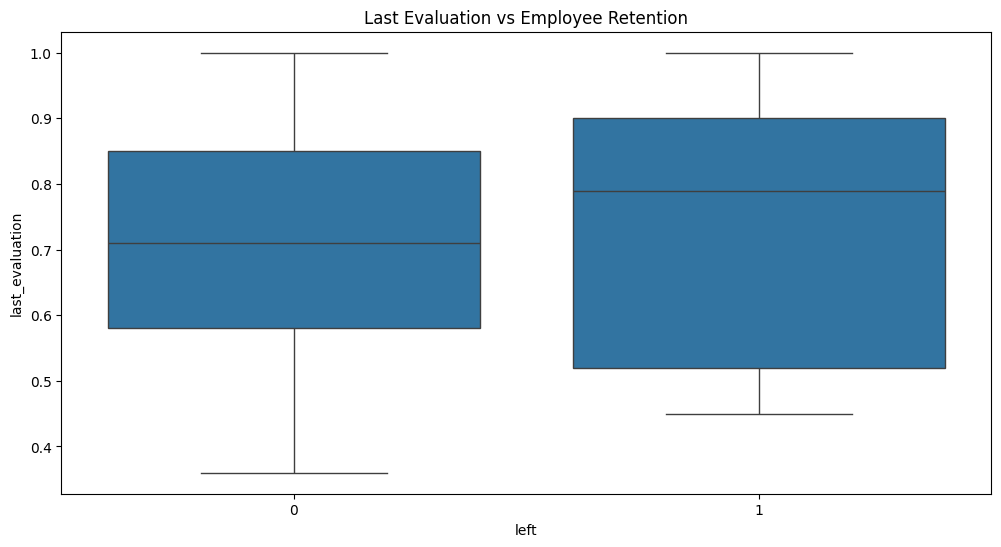

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='left', y='last_evaluation', data=df)
plt.title('Last Evaluation vs Employee Retention')
plt.show()

In [ ]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Confusion Matrix:
[[2109  185]
 [ 545  161]]


In [ ]:
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:")
print(importance)



Feature Importance:
                 Feature  Coefficient
1        last_evaluation     0.661284
4     time_spend_company     0.229096
3   average_montly_hours     0.005073
2         number_project    -0.292210
6  promotion_last_5years    -1.464107
5          Work_accident    -1.471005
0     satisfaction_level    -4.166543


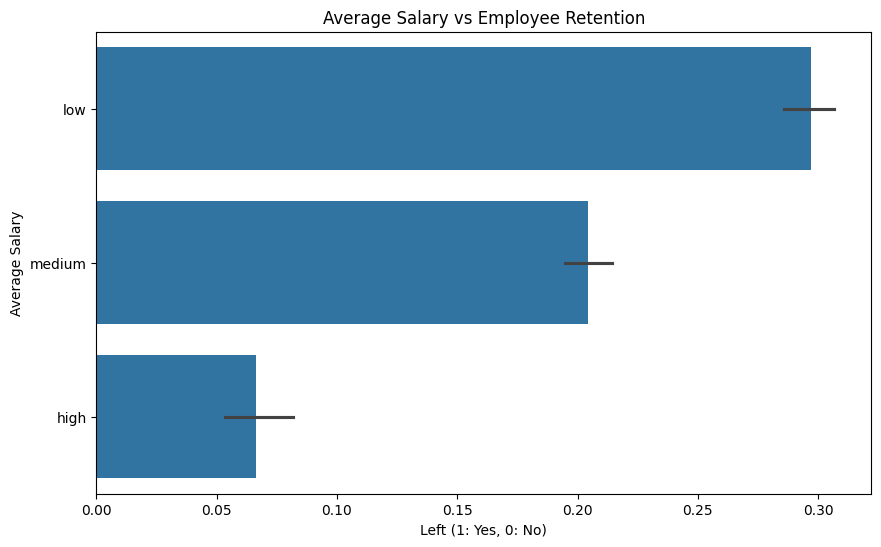

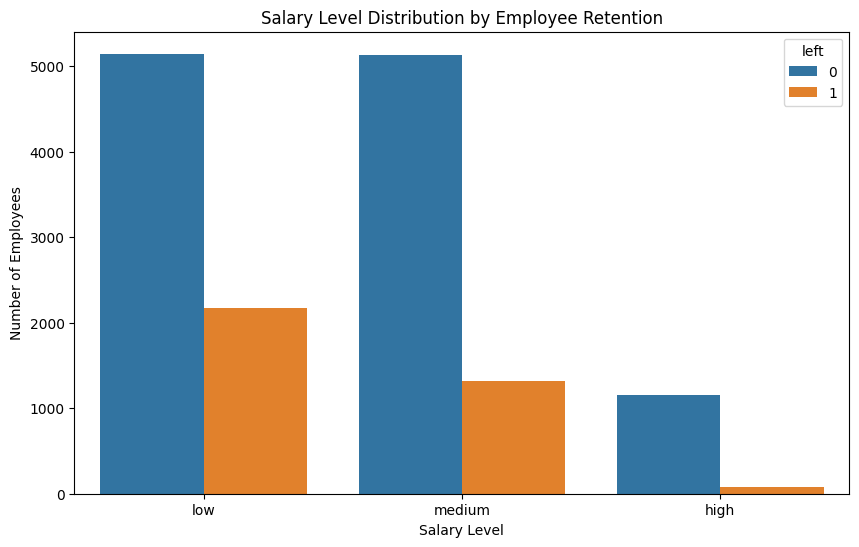

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='left', y='salary', data=df, estimator=np.mean)
plt.title('Average Salary vs Employee Retention')
plt.xlabel('Left (1: Yes, 0: No)')
plt.ylabel('Average Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Salary Level Distribution by Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()


<ipython-input-28-5a510f92c252>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Department", y="left", data=department_retention, palette="viridis")


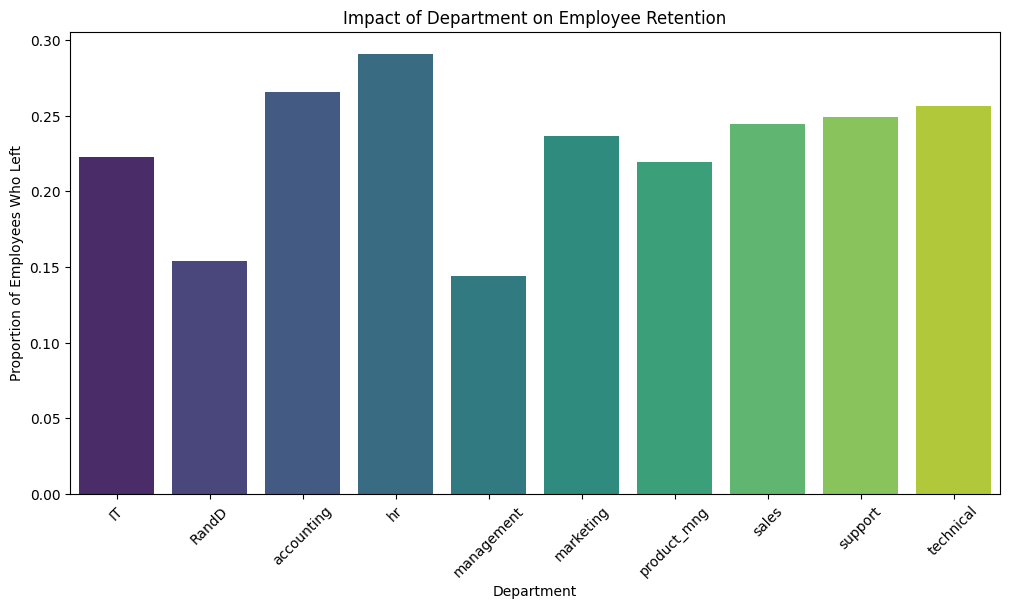

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HR_comma_sep.csv")

department_retention = df.groupby("Department")["left"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Department", y="left", data=department_retention, palette="viridis")

plt.xlabel("Department")
plt.ylabel("Proportion of Employees Who Left")
plt.title("Impact of Department on Employee Retention")
plt.xticks(rotation=45)
plt.show()


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.7566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Confusion Matrix:
[[2109  185]
 [ 545  161]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Confusion Matrix:
[[2109  185]
 [ 545  161]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
